In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
#url = "https://www.kaggle.com/jemishdonda/headbrain"
df = pd.read_csv('C:/Users/DELL/Downloads/headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [26]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [27]:
df.shape

(237, 4)

In [28]:
X = df['Head Size(cm^3)'].values
Y =  df['Brain Weight(grams)'].values

In [29]:
X.shape

(237,)

In [30]:
Y.shape

(237,)

In [31]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)

num =0
denom = 0

for i in range(n):
    num += (X[i]-mean_X)* (Y[i]-mean_Y)
    denom +=(X[i]-mean_X)**2
m = num/denom
c = mean_Y - (m*mean_X)

print(m,',',c)

0.26342933948939945 , 325.57342104944223


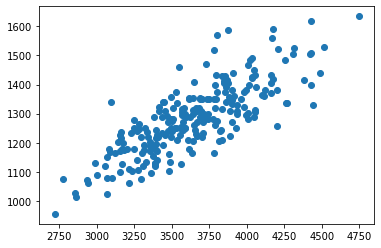

In [32]:
plt.scatter(X,Y)

In [33]:
min_x = np.min(X)-100
max_x = np.max(X)+100

In [34]:
x = np.linspace(min_x,max_x,1000)

In [35]:
y = m*x+c

Text(0, 0.5, 'Brain weight in grams')

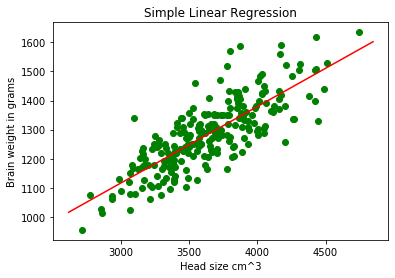

In [36]:
plt.scatter(X,Y,color='g')
plt.plot(x,y,color='r')
plt.title('Simple Linear Regression')
plt.xlabel('Head size cm^3')
plt.ylabel('Brain weight in grams')

In [37]:
sum_pred = 0
sum_act = 0

for i in range(n):
    y_pred = (m*X[i]+c)
    sum_pred += (Y[i]-y_pred)**2
    sum_act +=(Y[i]-mean_Y)**2

r2 = 1-(sum_pred/sum_act)
print(r2)

0.6393117199570003


In [38]:
def predict(x):
    y = m*x + c
    print(y)

In [39]:
predict(4177)

1425.9177720966638


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X  = X.reshape((n,1))

In [41]:
X.shape

(237, 1)

In [42]:
y.shape

(1000,)

In [43]:
lg = LinearRegression()

In [44]:
lg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
y_pred = lg.predict(X)

In [46]:
mse = mean_squared_error(Y,y_pred)

In [47]:
rmse = np.sqrt(mse)

In [48]:
r2_score = lg.score(X,Y)

In [49]:
print(rmse)
print(r2_score)

72.1206213783709
0.639311719957


In [50]:
lg.predict([[4177]])

array([1425.9177721])

In [51]:
lg.intercept_

325.5734210494428